# Web Scraping
---
**Web scraping** en la web de Marca. La funcionalidad de esta técnica es recopilar gran cantidad de información de sitios web.

Aquí está alguna de las características de Python que lo hace más adecuado para realizar **web-scrapping**:

* **Facilidad de uso:** Python es simple de codificar. No es necesario agregar punto y coma ";" o llaves "{}" en cualquier lugar. Esto lo hace menos desordenado y fácil de usar.
* **Gran colección de bibliotecas:** Python tiene una gran colección de bibliotecas como Numpy , Matlplotlib , Pandas , etc., que proporciona métodos y servicios para diversos fines. Por lo tanto, es adecuado para esta técnica y para una mayor manipulación de los datos extraídos.
* **Tipo dinámico:** en Python, no tiene que definir tipos de datos para variables, puede usar directamente las variables donde sea necesario. Esto ahorra tiempo y agiliza su trabajo.

# Librerias
---

In [2]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Extraer las siguientes características para el equipo de análisis, en este caso, `FC Barcelona`:
    - Nombre de la jornada
    - Equipo local
    - Equipo visitante
    - Resultado del partido
---

In [2]:
url = "https://www.marca.com/futbol/primera/calendario.html"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [3]:
resultados = []
jornadas = soup('div', 'jornada calendarioInternacional')

In [4]:
for jornada in jornadas:
    nombre_jornada = jornada.find('table', 'jor agendas').caption.text
    
    # Matches
    partidos_jornada = jornada.find('table', 'jor agendas').find('tbody').find_all('tr')

    for partido_jornada in partidos_jornada:
        partido = {}
        local = ""
        visitante = ""

        try:
            local = partido_jornada.find('td', 'local').span.text
            visitante = partido_jornada.find('td', 'visitante').span.text
            resultado = partido_jornada.find('td', 'resultado').span.text
        except:
            pass
    
        if 'Barcelona' in [local, visitante]:
            # Store the info of the match
            partido['nombre_jornada'] = nombre_jornada
            partido['local'] = local
            partido['visitante'] = visitante
            partido['resultado'] = resultado
            resultados.append(partido)
resultados

[{'nombre_jornada': 'Jornada 1',
  'local': 'Barcelona',
  'visitante': 'Alavés',
  'resultado': '3-0'},
 {'nombre_jornada': 'Jornada 2',
  'local': 'Valladolid',
  'visitante': 'Barcelona',
  'resultado': '0-1'},
 {'nombre_jornada': 'Jornada 3',
  'local': 'Barcelona',
  'visitante': 'Huesca',
  'resultado': '8-2'},
 {'nombre_jornada': 'Jornada 4',
  'local': 'R. Sociedad',
  'visitante': 'Barcelona',
  'resultado': '1-2'},
 {'nombre_jornada': 'Jornada 5',
  'local': 'Barcelona',
  'visitante': 'Girona',
  'resultado': '2-2'},
 {'nombre_jornada': 'Jornada 6',
  'local': 'Leganés',
  'visitante': 'Barcelona',
  'resultado': '2-1'},
 {'nombre_jornada': 'Jornada 7',
  'local': 'Barcelona',
  'visitante': 'Athletic',
  'resultado': '1-1'},
 {'nombre_jornada': 'Jornada 8',
  'local': 'Valencia',
  'visitante': 'Barcelona',
  'resultado': '1-1'},
 {'nombre_jornada': 'Jornada 9',
  'local': 'Barcelona',
  'visitante': 'Sevilla',
  'resultado': '4-2'},
 {'nombre_jornada': 'Jornada 10',
  'loc

# Guadar el resultado en un `JSON`
---

In [5]:
with open('resultados_barcelona.json', 'w') as outfile:
    json.dump(resultados, outfile)

# Cargar los datos en un DataFrame de pandas. Mostrar el atributo `shape` del DataFrame, las columnas, las primeras cinco filas y mostrar un análisis estadístico básico del DataFrame
---

In [6]:
with open('resultados_barcelona.json') as json_file:
    json_data = json.load(json_file)
print(json_data)

[{'nombre_jornada': 'Jornada 1', 'local': 'Barcelona', 'visitante': 'Alavés', 'resultado': '3-0'}, {'nombre_jornada': 'Jornada 2', 'local': 'Valladolid', 'visitante': 'Barcelona', 'resultado': '0-1'}, {'nombre_jornada': 'Jornada 3', 'local': 'Barcelona', 'visitante': 'Huesca', 'resultado': '8-2'}, {'nombre_jornada': 'Jornada 4', 'local': 'R. Sociedad', 'visitante': 'Barcelona', 'resultado': '1-2'}, {'nombre_jornada': 'Jornada 5', 'local': 'Barcelona', 'visitante': 'Girona', 'resultado': '2-2'}, {'nombre_jornada': 'Jornada 6', 'local': 'Leganés', 'visitante': 'Barcelona', 'resultado': '2-1'}, {'nombre_jornada': 'Jornada 7', 'local': 'Barcelona', 'visitante': 'Athletic', 'resultado': '1-1'}, {'nombre_jornada': 'Jornada 8', 'local': 'Valencia', 'visitante': 'Barcelona', 'resultado': '1-1'}, {'nombre_jornada': 'Jornada 9', 'local': 'Barcelona', 'visitante': 'Sevilla', 'resultado': '4-2'}, {'nombre_jornada': 'Jornada 10', 'local': 'Barcelona', 'visitante': 'Real Madrid', 'resultado': '5-1'}

In [7]:
frame_resultados = pd.read_json('resultados_barcelona.json')
frame_resultados

,local,nombre_jornada,resultado,visitante
0,Barcelona,Jornada 1,3-0,Alavés
1,Valladolid,Jornada 2,0-1,Barcelona
2,Barcelona,Jornada 3,8-2,Huesca
3,R. Sociedad,Jornada 4,1-2,Barcelona
4,Barcelona,Jornada 5,2-2,Girona
5,Leganés,Jornada 6,2-1,Barcelona
6,Barcelona,Jornada 7,1-1,Athletic
7,Valencia,Jornada 8,1-1,Barcelona
8,Barcelona,Jornada 9,4-2,Sevilla
9,Barcelona,Jornada 10,5-1,Real Madrid


Vamos a seleccionar los partidos en los que podemos encontrar resultados, es decir, partidos donde encontremos en el resultado '-':

In [8]:
resultado = frame_resultados['resultado']
numero_partidos = frame_resultados.shape[0]

for i in range(numero_partidos):
    if resultado[i].find('-') == -1:
        frame_resultados = frame_resultados[frame_resultados.index != i]
frame_resultados

,local,nombre_jornada,resultado,visitante
0,Barcelona,Jornada 1,3-0,Alavés
1,Valladolid,Jornada 2,0-1,Barcelona
2,Barcelona,Jornada 3,8-2,Huesca
3,R. Sociedad,Jornada 4,1-2,Barcelona
4,Barcelona,Jornada 5,2-2,Girona
5,Leganés,Jornada 6,2-1,Barcelona
6,Barcelona,Jornada 7,1-1,Athletic
7,Valencia,Jornada 8,1-1,Barcelona
8,Barcelona,Jornada 9,4-2,Sevilla
9,Barcelona,Jornada 10,5-1,Real Madrid


In [9]:
frame_resultados.shape

(22, 4)

* Imprimimos las 5 primeras jornadas:

In [10]:
frame_resultados.loc[0:4,]

,local,nombre_jornada,resultado,visitante
0,Barcelona,Jornada 1,3-0,Alavés
1,Valladolid,Jornada 2,0-1,Barcelona
2,Barcelona,Jornada 3,8-2,Huesca
3,R. Sociedad,Jornada 4,1-2,Barcelona
4,Barcelona,Jornada 5,2-2,Girona


In [11]:
frame_resultados.columns

Index(['local', 'nombre_jornada', 'resultado', 'visitante'], dtype='object')

* Análisis descriptivo

In [12]:
frame_resultados.describe()

,local,nombre_jornada,resultado,visitante
count,22,22,22,22
unique,11,22,16,13
top,Barcelona,Jornada 2,1-1,Barcelona
freq,12,1,3,10


# Mostrar los partidos que el `Barcelona` ha ganado de visitante. Mostrar también los que ha ganado de local
---
## Barcelona jugando como visitante

In [13]:
partidos_visitante = frame_resultados[frame_resultados['visitante'] == 'Barcelona']
partidos_visitante

,local,nombre_jornada,resultado,visitante
1,Valladolid,Jornada 2,0-1,Barcelona
3,R. Sociedad,Jornada 4,1-2,Barcelona
5,Leganés,Jornada 6,2-1,Barcelona
7,Valencia,Jornada 8,1-1,Barcelona
10,Rayo,Jornada 11,2-3,Barcelona
12,Atlético,Jornada 13,1-1,Barcelona
14,Espanyol,Jornada 15,0-4,Barcelona
15,Levante,Jornada 16,0-5,Barcelona
17,Getafe,Jornada 18,1-2,Barcelona
20,Girona,Jornada 21,0-2,Barcelona


* Convertimos a listas los carácteres de los resultados y las jornadas

In [14]:
partidos_visitante_resultados = partidos_visitante['resultado'].tolist()
partidos_visitante_jornada = partidos_visitante['nombre_jornada'].tolist()
partidos_visitante_resultados

['0-1', '1-2', '2-1', '1-1', '2-3', '1-1', '0-4', '0-5', '1-2', '0-2']

* ¿Cuáles son las jornadas en las que el Barcelona ha ganado siendo visitante?

In [15]:
jornadas_ganadas = []
for j in range(len(partidos_visitante_resultados)):
    resultado_partido = partidos_visitante_resultados[j]
    if resultado_partido[0] < resultado_partido[2]:
        a = partidos_visitante_jornada[j]
        jornadas_ganadas.append(a)
        j += 1
jornadas_ganadas

['Jornada 2',
 'Jornada 4',
 'Jornada 11',
 'Jornada 15',
 'Jornada 16',
 'Jornada 18',
 'Jornada 21']

* ¿En qué jornadas ha perdido el Barcelona?

In [16]:
jornadas_perdidas = []
for j in range(len(partidos_visitante_resultados)):
    resultado_partido = partidos_visitante_resultados[j]
    if resultado_partido[0] > resultado_partido[2]:
        a = partidos_visitante_jornada[j]
        jornadas_perdidas.append(a)
        j += 1
jornadas_perdidas

['Jornada 6']

## Barcelona jugando como local

In [17]:
partidos_local = frame_resultados[frame_resultados['local'] == 'Barcelona']
partidos_local

,local,nombre_jornada,resultado,visitante
0,Barcelona,Jornada 1,3-0,Alavés
2,Barcelona,Jornada 3,8-2,Huesca
4,Barcelona,Jornada 5,2-2,Girona
6,Barcelona,Jornada 7,1-1,Athletic
8,Barcelona,Jornada 9,4-2,Sevilla
9,Barcelona,Jornada 10,5-1,Real Madrid
11,Barcelona,Jornada 12,3-4,Betis
13,Barcelona,Jornada 14,2-0,Villarreal
16,Barcelona,Jornada 17,2-0,Celta
18,Barcelona,Jornada 19,3-0,Eibar


* Convertimos a listas los carácteres de los resultados y las jornadas

In [18]:
partidos_local_resultados = partidos_local['resultado'].tolist()
partidos_local_jornada = partidos_local['nombre_jornada'].tolist()
partidos_local_resultados

['3-0',
 '8-2',
 '2-2',
 '1-1',
 '4-2',
 '5-1',
 '3-4',
 '2-0',
 '2-0',
 '3-0',
 '3-1',
 '2-2']

* ¿Cuáles son las jornadas en las que el Barcelona ha ganado siendo visitante?

In [19]:
jornadas_ganadas = []
for j in range(len(partidos_local_resultados)):
    resultado_partido = partidos_local_resultados[j]
    if resultado_partido[0] > resultado_partido[2]:
        a = partidos_local_jornada[j]
        jornadas_ganadas.append(a)
        j += 1
jornadas_ganadas

['Jornada 1',
 'Jornada 3',
 'Jornada 9',
 'Jornada 10',
 'Jornada 14',
 'Jornada 17',
 'Jornada 19',
 'Jornada 20']

* ¿En qué jornadas ha perdido el Barcelona?

In [20]:
jornadas_perdidas = []
for j in range(len(partidos_local_resultados)):
    resultado_partido = partidos_local_resultados[j]
    if resultado_partido[0] < resultado_partido[2]:
        a = partidos_local_jornada[j]
        jornadas_perdidas.append(a)
        j += 1
jornadas_perdidas

['Jornada 12']

## Creación de un nuevo dataframe

Añadiremos dos nuevas columnas a *frame_resultados*:

* la primera determinará si el Barcelona es local o visitante

* la segunda nos dirá si el Barcelona ha ganado el partido o lo ha perdido

In [20]:
es_local = []
for i in range(len(frame_resultados)):
    if frame_resultados.loc[i, 'local']== "Barcelona":
        es_local.append("local")
    else:
        es_local.append("visitante")
es_local

['local',
 'visitante',
 'local',
 'visitante',
 'local',
 'visitante',
 'local',
 'visitante',
 'local',
 'local',
 'visitante',
 'local',
 'visitante',
 'local',
 'visitante',
 'visitante',
 'local',
 'visitante',
 'local',
 'local',
 'visitante',
 'local']

In [21]:
resultado = frame_resultados['resultado'].tolist()
triunfo_derrota = []
for i in range(len(resultado)):
    r = resultado[i]
    if r in partidos_local_resultados:
        if r[0] > r[2]:
            triunfo_derrota.append("victoria")
        else:
            if r[0] < r[2]:
                triunfo_derrota.append("derrota")
            else:
                triunfo_derrota.append("empate")
    else:
        if r in partidos_visitante_resultados:
            if r[0] < r[2]:
                triunfo_derrota.append("victoria")
            else:
                if r[0] > r[2]:
                    triunfo_derrota.append("derrota")
                else:
                    triunfo_derrota.append("empate")
triunfo_derrota

['victoria',
 'victoria',
 'victoria',
 'victoria',
 'empate',
 'derrota',
 'empate',
 'empate',
 'victoria',
 'victoria',
 'victoria',
 'derrota',
 'empate',
 'victoria',
 'victoria',
 'victoria',
 'victoria',
 'victoria',
 'victoria',
 'victoria',
 'victoria',
 'empate']

Visualizamos el nuevo dataframe:

In [22]:
local_visitante = DataFrame({'local_visitante': es_local}) 
triunfo = DataFrame({'triunfo_derrota': triunfo_derrota})
df = frame_resultados.join(local_visitante)
completo = df.join(triunfo)
completo

,local,nombre_jornada,resultado,visitante,local_visitante,triunfo_derrota
0,Barcelona,Jornada 1,3-0,Alavés,local,victoria
1,Valladolid,Jornada 2,0-1,Barcelona,visitante,victoria
2,Barcelona,Jornada 3,8-2,Huesca,local,victoria
3,R. Sociedad,Jornada 4,1-2,Barcelona,visitante,victoria
4,Barcelona,Jornada 5,2-2,Girona,local,empate
5,Leganés,Jornada 6,2-1,Barcelona,visitante,derrota
6,Barcelona,Jornada 7,1-1,Athletic,local,empate
7,Valencia,Jornada 8,1-1,Barcelona,visitante,empate
8,Barcelona,Jornada 9,4-2,Sevilla,local,victoria
9,Barcelona,Jornada 10,5-1,Real Madrid,local,victoria


# Comparar gráficamente los resultados de local y visitante
---

## Tabla de contingencia

In [23]:
pd.crosstab(index=completo['local_visitante'],
            columns=completo['triunfo_derrota'], margins=True)

triunfo_derrota,derrota,empate,victoria,All
local_visitante,,,,
local,1,3,8,12
visitante,1,2,7,10
All,2,5,15,22


### Tabla de contingencia en porcentajes relativos según triunfo/derrota

In [24]:
pd.crosstab(index=completo['local_visitante'], 
            columns=completo['triunfo_derrota']).apply(lambda r: r/r.sum() *100,axis=1)

triunfo_derrota,derrota,empate,victoria
local_visitante,,,
local,8.333333,25.0,66.666667
visitante,10.000000,20.0,70.000000


## Representación gráfica

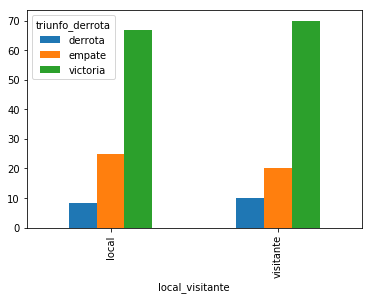

In [26]:
plot = pd.crosstab(index=completo['local_visitante'],
                   columns=completo['triunfo_derrota']).apply(lambda r: r/r.sum() *100,
                                                              axis=1).plot(kind='bar')

### Gráfico de barras

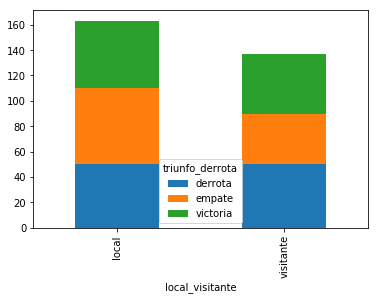

In [27]:
plot = pd.crosstab(index=completo['local_visitante'],
                   columns=completo['triunfo_derrota']).apply(lambda r: r/r.sum() *100,
                                                              axis=0).plot(kind='bar', stacked=True)

### Usando ahora *matplotlib*

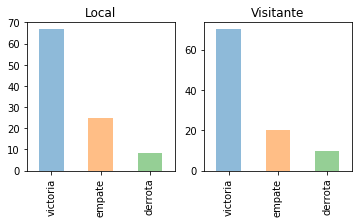

In [29]:
fig = plt.figure(figsize=(9,6))
plt.subplot2grid((2,3),(0,0))
(completo.triunfo_derrota[completo.local_visitante == 'local'].value_counts(normalize=True)*100).plot(kind='bar',alpha=0.5)
plt.title('Local')
plt.subplot2grid((2,3),(0,1))
(completo.triunfo_derrota[completo.local_visitante == 'visitante'].value_counts(normalize=True)*100).plot(kind='bar',alpha=0.5)
plt.title('Visitante')
plt.show()

### Gráfico "de tarta" de triunfos/derrotas/empates del Barcelona

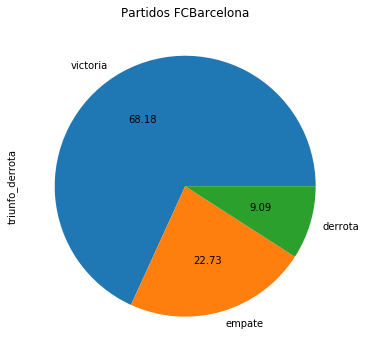

In [30]:
plot = completo['triunfo_derrota'].value_counts().plot(kind='pie', autopct='%.2f', 
                                                       figsize=(6, 6), title='Partidos FCBarcelona')